In [504]:
import numpy as np
import pandas as pd

### Распределение жилой площади ВС

Формируем датафрейм

In [505]:
n_samples = 1000
rang_list = ['лейтенант', 'ст_лейтенант', 'капитан', 'майор', 'под_полковник', 'полковник']
status = ['женат', 'холост']

age = np.random.choice(np.arange(18,60), n_samples)
children = np.random.choice(4, n_samples)
visluga = np.random.choice(30, n_samples)

length = np.random.choice(8, n_samples)+2
width = np.random.choice(8, n_samples)+2 
meters = length * width

data = pd.DataFrame({'age': age,  'children': children,  'visluga': visluga,  'length': length, 'width': width, 'meters': meters})
data['apartment'] = 'null'
data['rang'] = 'null'
data['get_apartment'] = 'null'

data.iloc[data.visluga <= 3, 7]=rang_list[0]
data.iloc[(data.visluga > 3)&(data.visluga <= 7), 7]=np.random.choice([rang_list[0],rang_list[1]])
data.iloc[(data.visluga > 7)&(data.visluga <= 11), 7]=np.random.choice([rang_list[0],rang_list[1],rang_list[2]])
data.iloc[(data.visluga > 11)&(data.visluga <= 15), 7]=np.random.choice([rang_list[0],rang_list[1],rang_list[2], rang_list[3]])
data.iloc[(data.visluga > 15)&(data.visluga <= 18), 7]=np.random.choice([rang_list[0],rang_list[1],rang_list[2], rang_list[3], rang_list[4]])
data.iloc[data.visluga > 18, 7]=np.random.choice([rang_list[0],rang_list[1],rang_list[2], rang_list[3], rang_list[4], rang_list[5]])

data.iloc[data.meters <= 20, 6]='общежитие'
data.iloc[(data.meters >= 20) & (data.meters <= 50), 6]=np.random.choice(['однушка'])
data.iloc[(data.meters >= 50) & (data.meters <= 70), 6]=np.random.choice(['двушка','однушка'])
data.iloc[data.meters >= 70, 6]=np.random.choice(['двушка','трешка'])

data.iloc[(data.children == 0), 8 ] = np.random.choice([None,'однушка'])
data.iloc[(data.children == 1), 8] = np.random.choice(['однушка'])
data.iloc[(data.children == 2), 8] = np.random.choice(['двушка', 'трешка'])
data.iloc[(data.children > 2), 8] = np.random.choice(['трешка'])

data.head()

,age,children,visluga,length,width,meters,apartment,rang,get_apartment
0,22,3,18,4,5,20,однушка,лейтенант,трешка
1,18,2,26,7,2,14,общежитие,капитан,двушка
2,38,1,27,5,4,20,однушка,капитан,однушка
3,55,1,19,2,4,8,общежитие,капитан,однушка
4,18,1,16,6,6,36,однушка,лейтенант,однушка


Какие виды служебных квартир бывают

In [506]:
data.get_apartment.value_counts()

трешка     264
однушка    245
двушка     245
Name: get_apartment, dtype: int64

Проверим есть ли неопределенные значения

In [507]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            1000 non-null   int64 
 1   children       1000 non-null   int64 
 2   visluga        1000 non-null   int64 
 3   length         1000 non-null   int64 
 4   width          1000 non-null   int64 
 5   meters         1000 non-null   int64 
 6   apartment      1000 non-null   object
 7   rang           1000 non-null   object
 8   get_apartment  754 non-null    object
dtypes: int64(6), object(3)
memory usage: 70.4+ KB


Посчитаем их количество

In [508]:
data.isnull().sum()

age                0
children           0
visluga            0
length             0
width              0
meters             0
apartment          0
rang               0
get_apartment    246
dtype: int64

Приобразуем данные

In [510]:
data = pd.get_dummies(data, columns = ['apartment', 'rang'] )

In [511]:
data

,age,children,visluga,length,width,meters,get_apartment,apartment_общежитие,apartment_однушка,apartment_трешка,rang_капитан,rang_лейтенант,rang_майор,rang_ст_лейтенант
0,22,3,18,4,5,20,трешка,0,1,0,0,1,0,0
1,18,2,26,7,2,14,двушка,1,0,0,1,0,0,0
2,38,1,27,5,4,20,однушка,0,1,0,1,0,0,0
3,55,1,19,2,4,8,однушка,1,0,0,1,0,0,0
4,18,1,16,6,6,36,однушка,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,34,0,1,6,3,18,None,1,0,0,0,1,0,0
996,47,0,16,7,7,49,None,0,1,0,0,1,0,0
997,29,0,21,5,5,25,None,0,1,0,1,0,0,0
998,22,0,22,5,3,15,None,1,0,0,1,0,0,0


### 1. Какую квартиру получит ВС (не) имеющий детей?

Категориальная задача

In [512]:
data['get_apartment'] = data.get_apartment.fillna('ожидает')

In [513]:
data

,age,children,visluga,length,width,meters,get_apartment,apartment_общежитие,apartment_однушка,apartment_трешка,rang_капитан,rang_лейтенант,rang_майор,rang_ст_лейтенант
0,22,3,18,4,5,20,трешка,0,1,0,0,1,0,0
1,18,2,26,7,2,14,двушка,1,0,0,1,0,0,0
2,38,1,27,5,4,20,однушка,0,1,0,1,0,0,0
3,55,1,19,2,4,8,однушка,1,0,0,1,0,0,0
4,18,1,16,6,6,36,однушка,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,34,0,1,6,3,18,ожидает,1,0,0,0,1,0,0
996,47,0,16,7,7,49,ожидает,0,1,0,0,1,0,0
997,29,0,21,5,5,25,ожидает,0,1,0,1,0,0,0
998,22,0,22,5,3,15,ожидает,1,0,0,1,0,0,0


Преобразуем данные (придадим вес)

In [514]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(data['get_apartment'])
le.classes_

array(['двушка', 'однушка', 'ожидает', 'трешка'], dtype=object)

In [520]:
# записываем в переменную y преобразованный столбец

y = pd.Series(data = le.transform(data['get_apartment']) )
y

0      3
1      0
2      1
3      1
4      1
      ..
995    2
996    2
997    2
998    2
999    2
Length: 1000, dtype: int64

In [526]:
X = data.drop('get_apartment', axis=1)

In [527]:
X

,age,children,visluga,length,width,meters,apartment_общежитие,apartment_однушка,apartment_трешка,rang_капитан,rang_лейтенант,rang_майор,rang_ст_лейтенант
0,22,3,18,4,5,20,0,1,0,0,1,0,0
1,18,2,26,7,2,14,1,0,0,1,0,0,0
2,38,1,27,5,4,20,0,1,0,1,0,0,0
3,55,1,19,2,4,8,1,0,0,1,0,0,0
4,18,1,16,6,6,36,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,34,0,1,6,3,18,1,0,0,0,1,0,0
996,47,0,16,7,7,49,0,1,0,0,1,0,0
997,29,0,21,5,5,25,0,1,0,1,0,0,0
998,22,0,22,5,3,15,1,0,0,1,0,0,0


In [528]:
y

0      3
1      0
2      1
3      1
4      1
      ..
995    2
996    2
997    2
998    2
999    2
Length: 1000, dtype: int64

In [529]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [537]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(max_iter=3000).fit(X_train, y_train)

print('Weights: {}'.format(LR.coef_))
print('\n')
print('Bias: {}'.format(LR.intercept_))

Weights: [[-4.78874113e-04  2.67226745e+00  5.51541117e-03  2.31447855e-02
   2.40580430e-02 -5.27756154e-03  1.09207700e-01 -2.79521541e-02
  -7.15258167e-02 -1.06547682e-01  7.13743836e-02  2.43850670e-02
   2.05179601e-02]
 [-4.62642227e-03 -2.74137721e+00 -5.76167158e-03 -3.57441172e-02
  -7.63920077e-02  7.75287471e-03 -1.60593475e-01  8.87878176e-02
   7.64532576e-02  3.67379957e-02 -6.20089186e-02  6.68869531e-02
  -3.69684300e-02]
 [ 5.71351140e-03 -8.73420690e+00 -5.48256855e-04  2.73839392e-02
   4.46061580e-02 -4.15156669e-03  8.88349941e-02 -1.84838256e-02
  -7.37482558e-02 -2.98005381e-02  4.17212145e-02 -2.20874971e-03
  -1.31090140e-02]
 [-6.08215017e-04  8.80331666e+00  7.94517262e-04 -1.47846074e-02
   7.72780668e-03  1.67625351e-03 -3.74492189e-02 -4.23518380e-02
   6.88208149e-02  9.96102241e-02 -5.10866796e-02 -8.90632704e-02
   2.95594839e-02]]


Bias: [ -1.15502429   7.74883389   9.64802186 -16.24183146]


In [550]:
prediction = LR.predict(X_test)
prediction

array([1, 3, 1, 3, 2, 0, 3, 0, 1, 2, 2, 3, 3, 1, 2, 3, 3, 3, 1, 0, 2, 2,
       1, 1, 3, 3, 2, 1, 1, 3, 2, 2, 0, 3, 3, 0, 0, 1, 2, 3, 2, 3, 0, 0,
       2, 3, 2, 0, 3, 2, 3, 1, 3, 0, 1, 2, 0, 1, 1, 3, 1, 2, 3, 2, 3, 2,
       0, 0, 3, 2, 2, 2, 1, 1, 3, 1, 1, 2, 1, 3, 0, 1, 0, 0, 1, 0, 2, 1,
       0, 3, 0, 2, 0, 2, 3, 1, 0, 0, 3, 3, 2, 0, 3, 1, 1, 2, 1, 2, 1, 1,
       2, 2, 1, 0, 1, 1, 0, 1, 1, 0, 2, 3, 2, 0, 1, 1, 2, 0, 3, 1, 3, 3,
       0, 2, 0, 3, 1, 2, 0, 3, 3, 0, 3, 3, 1, 2, 1, 0, 3, 3, 0, 2, 1, 3,
       3, 2, 0, 1, 3, 3, 1, 3, 2, 1, 1, 2, 0, 3, 2, 2, 0, 0, 2, 1, 3, 0,
       0, 3, 2, 0, 2, 1, 3, 1, 1, 0, 1, 3, 3, 1, 0, 2, 2, 1, 1, 2, 2, 2,
       0, 1])

In [542]:
np.array(y_test)

array([1, 3, 1, 3, 2, 0, 3, 0, 1, 2, 2, 3, 3, 1, 2, 3, 3, 3, 1, 0, 2, 2,
       1, 1, 3, 3, 2, 1, 1, 3, 2, 2, 0, 3, 3, 0, 0, 1, 2, 3, 2, 3, 0, 0,
       2, 3, 2, 0, 3, 2, 3, 1, 3, 0, 1, 2, 0, 1, 1, 3, 1, 2, 3, 2, 3, 2,
       0, 0, 3, 2, 2, 2, 1, 1, 3, 1, 1, 2, 1, 3, 0, 1, 0, 0, 1, 0, 2, 1,
       0, 3, 0, 2, 0, 2, 3, 1, 0, 0, 3, 3, 2, 0, 3, 1, 1, 2, 1, 2, 1, 1,
       2, 2, 1, 0, 1, 1, 0, 1, 1, 0, 2, 3, 2, 0, 1, 1, 2, 0, 3, 1, 3, 3,
       0, 2, 0, 3, 1, 2, 0, 3, 3, 0, 3, 3, 1, 2, 1, 0, 3, 3, 0, 2, 1, 3,
       3, 2, 0, 1, 3, 3, 1, 3, 2, 1, 1, 2, 0, 3, 2, 2, 0, 0, 2, 1, 3, 0,
       0, 3, 2, 0, 2, 1, 3, 1, 1, 0, 1, 3, 3, 1, 0, 2, 2, 1, 1, 2, 2, 2,
       0, 1])

In [552]:
from sklearn.metrics import classification_reportr

print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       1.00      1.00      1.00        54
           2       1.00      1.00      1.00        50
           3       1.00      1.00      1.00        52

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [554]:
LR.score(X_train, y_train)

1.0

Найдена линейная зависиомть

### 2. Сколько детей, у того кто проживает в квартире?

In [563]:
data['get_apartment'] = pd.Series(data = le.transform(data['get_apartment']) )

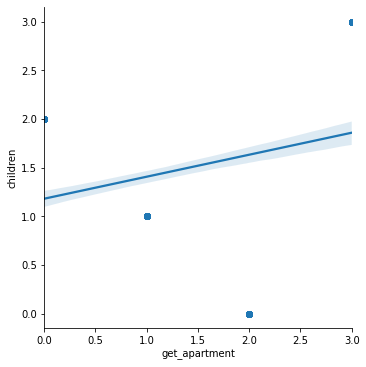

In [569]:
import seaborn as sns
from matplotlib import pyplot as plt

sns.lmplot(x='get_apartment', y="children", data=data, height=5)

In [571]:
from sklearn.linear_model import LinearRegression

X = data[['age', 'children', 'visluga', 'length', 'width', 'meters', 'get_apartment']]
y = data['children']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

reg = LinearRegression().fit(X_train, y_train)

print('Weights: {}'.format(reg.coef_))
print('\n')
print('Bias: {}'.format(reg.intercept_))

Weights: [-3.18006380e-18  1.00000000e+00 -1.11022302e-16  0.00000000e+00
  1.11022302e-16  0.00000000e+00 -1.38777878e-17]


Bias: 1.1102230246251565e-15


In [574]:
from sklearn.metrics import mean_absolute_error

pred_values = reg.predict(X_test)

print('Error: {}'.format(mean_absolute_error(pred_values, y_test)))

Error: 8.428818801562177e-16


In [576]:
reg.score(X_train, y_train)

1.0

Найдена линейная зависимость